# NHANES Hypothesis Tests Practice

<img src="images/hiptest.png"/>

### Import Labraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import scipy.stats.distributions as dist
from scipy.stats import norm
from statsmodels.stats.proportion import proportion_confint

In [2]:
da = pd.read_csv("data/nhanes_2015_2016.csv")

da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

In [3]:
# Create 2 groups: 'males' and 'females'

da_male_smoke = da[da['RIAGENDR']==1]['SMQ020']
da_male_smoke = da_male_smoke[~da_male_smoke.isna()]
da_male_smoke.reset_index(inplace=True, drop=True)

da_female_smoke = da[da['RIAGENDR']==2]['SMQ020']
da_female_smoke = da_female_smoke[~da_female_smoke.isna()]
da_female_smoke.reset_index(inplace=True, drop=True)

In [4]:
# Sample sizes

n_male_smoke = sum(da_male_smoke==1)

n_male_not_smoke = sum(da_male_smoke!=1)

n_total_male = len(da_male_smoke)


n_female_smoke = sum(da_female_smoke==1)

n_female_not_smoke = len(da_male_smoke) - sum(da_female_smoke==1)  # some gaps in data

n_total_female = len(da_male_smoke)


print(n_male_smoke,n_male_not_smoke,n_total_male)
print(n_female_smoke,n_female_not_smoke,n_total_female)

1413 1346 2759
906 1853 2759


In [5]:
# Proportions

prop_male_smoke = n_male_smoke / n_total_male

prop_female_smoke = n_female_smoke / n_total_female

print('Proportion smokers between males:', round(prop_male_smoke,2))

print('Proportion smokers between females:', round(prop_female_smoke,2))

Proportion smokers between males: 0.51
Proportion smokers between females: 0.33


In [6]:
# Hypothesis Test for the "Difference in Two Proportions"

# Sample sizes
n1 = n_total_male
n2 = n_total_female

# Number of smokers in each gender
y1 = n_male_smoke
y2 = n_female_smoke

# Estimates of the population proportions
p1 = prop_male_smoke
p2 = prop_female_smoke

# Estimate of the combined population proportion (a kind of mean)
phat = (y1 + y2) / (n1 + n2)

# Estimate of the variance of the combined population proportion
va = phat * (1 - phat)

# Estimate of the standard error of the combined population proportion
se = np.sqrt(va * (1 / n1 + 1 / n2))

# Test statistic and its p-value
test_stat = (p1 - p2) / se
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))

# Print the test statistic its p-value
print("Test Statistic")
print(round(test_stat, 2))

print("\nP-Value")
print(pvalue)

Test Statistic
13.83

P-Value
1.7414332306604475e-43


**Answer.** 

    Because our p-value < alpha value (0.05), we "Reject the null hypothesis".

The proportion of women who smoke **is not** the same the proportion of men who smoke.

__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

**Answer.** The proportion of women who smoke is significally different from the proportion of men who smoke.

__Q1b.__ Construct three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

In [7]:
# Standard Error for difference of 2 population proportions

# Standard Error for males
se_male = np.sqrt(prop_male_smoke * (1 - prop_male_smoke)/ n_total_male)

# Standard Error for females
se_female = np.sqrt(prop_female_smoke * (1 - prop_female_smoke)/ n_total_female)

# Standard Error for the difference
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.013057420421539416

In [8]:
# 95% C.I. for proportion female smokers

'''
se = np.sqrt((p * (1 - p))/n)

lcb = p - zstar * se
ucb = p + zstar * se

(lcb, ucb)
'''

# Boundaries
lcb_female = prop_female_smoke - 1.96 * se_female
ucb_female = prop_female_smoke + 1.96 * se_female

print('95% C.I. for proportion female smokers:',(lcb_female,ucb_female))

95% C.I. for proportion female smokers: (0.31085596540720084, 0.34590373013466214)


In [9]:
# 95% C.I. for proportion male smokers

'''
se = np.sqrt((p * (1 - p))/n)

lcb = p - zstar * se
ucb = p + zstar * se

(lcb, ucb)
'''

# Boundaries
lcb_male = prop_male_smoke - 1.96 * se_male
ucb_male = prop_male_smoke + 1.96 * se_male

print('95% C.I. for proportion female smokers:',(lcb_male,ucb_male))

95% C.I. for proportion female smokers: (0.4934902211293819, 0.5307939397984904)


In [10]:
# 95% C.I. for diference between proportions

'''
se_diff = np.sqrt(se_female**2 + se_male**2)

d = p1 - p2

lcb = d - zstar * se
ucb = d + zstar * se

(lcb, ucb)
'''

# Diference between proportions
d = prop_male_smoke - prop_female_smoke   

# Boundaries
lcb_diff = d - 1.96 * se_diff
ucb_diff = d + 1.96 * se_diff

print('95% C.I. for proportion female smokers:',(lcb_diff, ucb_diff))

95% C.I. for proportion female smokers: (0.15816968866678743, 0.20935477671922192)


__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

**Answer.** The confidence intervals support our conclusion that the the proportion of males who smoke is significant from the proportion of females who smoke. The confidence interval for the proportion of males who smoke does not overlap with the proportion of females who smoke. The confidence interval for the difference between the two proportions does not include zero.

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

In [11]:
# Partition the population into two groups based on whether a person has graduated college or not.

graduated_height_cm = da[da['DMDEDUC2']==5]['BMXHT']
graduated_height_cm = graduated_height_cm[~graduated_height_cm.isna()]
graduated_height_cm.reset_index(inplace=True, drop=True)

not_graduated_height_cm = da[da['DMDEDUC2']!=5]['BMXHT']
not_graduated_height_cm = not_graduated_height_cm[~not_graduated_height_cm.isna()]
not_graduated_height_cm.reset_index(inplace=True, drop=True)

In [12]:
# Sample Sizes

n_graduated_height_cm = len(graduated_height_cm)
n_not_graduated_height_cm = len(not_graduated_height_cm)

# Means

graduated_mean_height_cm = graduated_height_cm.mean()
not_graduated_mean_height_cm = not_graduated_height_cm.mean()

# Standard Deviations

graduated_std_height_cm = graduated_height_cm.std()
not_graduated_std_height_cm = not_graduated_height_cm.std()


print('----- Sample Sizes -----')
print(f'n_graduated_height_cm: {n_graduated_height_cm}')
print(f'n_not_graduated_height_cm: {n_not_graduated_height_cm}')
print()
print('----- Means -----')
print(f'graduated_mean_height_cm: {round(graduated_mean_height_cm,2)}')
print(f'not_graduated_mean_height_cm: {round(not_graduated_mean_height_cm,2)}')
print()
print('----- Standard Deviations -----')
print(f'graduated_std_height_cm: {round(graduated_std_height_cm,2)}')
print(f'not_graduated_std_height_cm: {round(not_graduated_std_height_cm,2)}')

----- Sample Sizes -----
n_graduated_height_cm: 1355
n_not_graduated_height_cm: 4318

----- Means -----
graduated_mean_height_cm: 167.86
not_graduated_mean_height_cm: 165.61

----- Standard Deviations -----
graduated_std_height_cm: 9.71
not_graduated_std_height_cm: 10.14


In [13]:
alpha = 0.05

# Graduated
n1 = 1355
xbar1 = 167.86
s1 = 9.71

# Not Graduated
n2 = 4318
xbar2 = 165.61
s2 = 10.14

delta_mu = 0   # Ho

z = ( (xbar1 - xbar2) - (delta_mu) )/ (np.sqrt( (s1**2/n1) + (s2**2/n2) ))

p_value = 2 * norm.cdf(-z, 0, 1)     # We want the right side in normal distribution
                                     # (2*) because is a 2 tail test

print("Z-statistic:", round(z,2))   
print("P-value:", p_value)
print("Alpha:", round(alpha,4))
print()


if p_value < alpha:    ### For All Analysis ###
    print('(p-value < alpha): Reject Ho!')
else:
    print('(p-value > alpha): Fail to reject Ho.')

Z-statistic: 7.36
P-value: 1.805613437347091e-13
Alpha: 0.05

(p-value < alpha): Reject Ho!


In [14]:
# Check with module 'statsmodels.api'

t_stat , p_value = sm.stats.ztest(x1 = graduated_height_cm, x2 = not_graduated_height_cm, alternative='two-sided')

# If was a t-distribution,  t_stat, p_val= ss.ttest_ind(graduated_height_cm,not_graduated_height_cm) 
#                                   module: import scipy.stats as ss 

print(f'T-statistic: {round(t_stat,4)}')
print()
print(f'P_value: {p_value}')

T-statistic: 7.2008

P_value: 5.987537169067422e-13


<img src="images/anotherway.jpg"/>

In [15]:
# The population into two groups in inches

graduated_height_inches = graduated_height_cm / 2.54
graduated_height_inches = graduated_height_inches[~graduated_height_inches.isna()]
graduated_height_inches.reset_index(inplace=True, drop=True)

not_graduated_height_inches = not_graduated_height_cm / 2.54
not_graduated_height_inches = not_graduated_height_inches[~not_graduated_height_inches.isna()]
not_graduated_height_inches.reset_index(inplace=True, drop=True)

In [16]:
# Sample Sizes
n_graduated_height_inches = len(graduated_height_inches)
n_not_graduated_height_inches = len(not_graduated_height_inches)

# Means
graduated_mean_height_inches = graduated_height_inches.mean()
not_graduated_mean_height_inches = not_graduated_height_inches.mean()

# Standard Deviations
graduated_std_height_inches = graduated_height_inches.std()
not_graduated_std_height_inches = not_graduated_height_inches.std()


print('----- Sample Sizes -----')
print(f'n_graduated_height_inches: {n_graduated_height_inches}')
print(f'n_not_graduated_height_inches: {n_not_graduated_height_inches}')
print()
print('----- Means -----')
print(f'graduated_mean_height_inches: {round(graduated_mean_height_inches,2)}')
print(f'not_graduated_mean_height_inches: {round(not_graduated_mean_height_inches,2)}')
print()
print('----- Standard Deviations -----')
print(f'graduated_std_height_inches: {round(graduated_std_height_inches,2)}')
print(f'not_graduated_std_height_inches: {round(not_graduated_std_height_inches,2)}')

----- Sample Sizes -----
n_graduated_height_inches: 1355
n_not_graduated_height_inches: 4318

----- Means -----
graduated_mean_height_inches: 66.08
not_graduated_mean_height_inches: 65.2

----- Standard Deviations -----
graduated_std_height_inches: 3.82
not_graduated_std_height_inches: 3.99


In [17]:
alpha = 0.05

# Graduated
n1 = 1355
xbar1 = 66.08
s1 = 3.82

# Not Graduated
n2 = 4318
xbar2 = 65.2
s2 = 3.99

delta_mu = 0   # Ho

z = ( (xbar1 - xbar2) - (delta_mu) )/ (np.sqrt( (s1**2/n1) + (s2**2/n2) ))

p_value = 2 * norm.cdf(-z, 0, 1)     # We want the right side in normal distribution
                                     # (2*) because is a 2 tail test

print("Z-statistic:", round(z,2))   
print("P-value:", p_value)
print("Alpha:", round(alpha,4))
print()


if p_value < alpha:    ### For All Analysis ###
    print('(p-value < alpha): Reject Ho!')
else:
    print('(p-value > alpha): Fail to reject Ho.')

Z-statistic: 7.32
P-value: 2.497114762190614e-13
Alpha: 0.05

(p-value < alpha): Reject Ho!


In [18]:
# Check with module 'statsmodels.api'

t_stat , p_value = sm.stats.ztest(x1 = graduated_height_inches, x2 = not_graduated_height_inches, alternative='two-sided')

# If was a t-distribution,  t_stat, p_val= ss.ttest_ind(graduated_height_cm,not_graduated_height_cm) 
#                                   module: import scipy.stats as ss 

print(f'T-statistic: {round(t_stat,4)}')
print()
print(f'P_value: {p_value}')

T-statistic: 7.2008

P_value: 5.987537169067249e-13


__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

**Answer:** Yes, there is a different average height in these two groups.

    Ho: avg height group1 == avg height group2
    Ha: avg height group1 != avg height group2

The p-value (5.987537169067249e-13) < Alpha (0.05, i.e. 95% Confidence), so we should *Reject the null hypothesis* in favor of the alternative one, there is a different average height in these two groups.

__Q2b:__ How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

**Asnwer:** There is no difference, the only numerical difference was in the rounding.

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

In [19]:
# Ho: avg BMI 30_40 == avg BMI 50_60
# Ha: avg BMI 30_40 != avg BMI 50_60

In [20]:
# Population Men 30-40

bmi_30_40 = da[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40)]
bmi_30_40.reset_index(inplace=True, drop=True)

bmi_men_30_40 = bmi_30_40[bmi_30_40['RIAGENDR']==1]['BMXBMI']
bmi_men_30_40 = bmi_men_30_40[~bmi_men_30_40.isna()]
bmi_men_30_40.reset_index(inplace=True, drop=True)


# Population Men 50-60

bmi_50_60 = da[(da['RIDAGEYR'] >= 50) & (da['RIDAGEYR'] <= 60)]
bmi_50_60.reset_index(inplace=True, drop=True)

bmi_men_50_60 = bmi_50_60[bmi_50_60['RIAGENDR']==1]['BMXBMI']
bmi_men_50_60 = bmi_men_50_60[~bmi_men_50_60.isna()]
bmi_men_50_60.reset_index(inplace=True, drop=True)

In [21]:
# Sample Sizes
n_bmi_men_30_40 = len(bmi_men_30_40)
n_bmi_men_50_60 = len(bmi_men_50_60)

# Means
mean_bmi_men_30_40 = bmi_men_30_40.mean()
mean_bmi_men_50_60 = bmi_men_50_60.mean()

# Standard Deviations
std_bmi_men_30_40 = bmi_men_30_40.std()
std_bmi_men_50_60 = bmi_men_50_60.std()


print('----- Sample Sizes -----')
print(f'n_bmi_men_30_40: {n_bmi_men_30_40}')
print(f'n_bmi_men_50_60: {n_bmi_men_50_60}')
print()
print('----- Means -----')
print(f'mean_bmi_men_30_40: {round(mean_bmi_men_30_40,2)}')
print(f'mean_bmi_men_50_60: {round(mean_bmi_men_50_60,2)}')
print()
print('----- Standard Deviations -----')
print(f'std_bmi_men_30_40: {round(std_bmi_men_30_40,2)}')
print(f'std_bmi_men_50_60: {round(std_bmi_men_50_60,2)}')

----- Sample Sizes -----
n_bmi_men_30_40: 488
n_bmi_men_50_60: 492

----- Means -----
mean_bmi_men_30_40: 29.61
mean_bmi_men_50_60: 29.25

----- Standard Deviations -----
std_bmi_men_30_40: 6.66
std_bmi_men_50_60: 6.0


In [22]:
alpha = 0.05

# Men 30-40
n1 = 446
xbar1 = 29.77
s1 = 6.83

# Men 50-60
n2 = 436
xbar2 = 29.19
s2 = 5.97

delta_mu = 0   # Ho

z = ( (xbar1 - xbar2) - (delta_mu) )/ (np.sqrt( (s1**2/n1) + (s2**2/n2) ))

p_value = 2 * norm.cdf(-z, 0, 1)     # We want the right side in normal distribution
                                     # (2*) because is a 2 tail test

print("Z-statistic:", round(z,2))   
print("P-value:", p_value)
print("Alpha:", round(alpha,4))
print()


if p_value < alpha:    ### For All Analysis ###
    print('(p-value < alpha): Reject Ho!')
else:
    print('(p-value > alpha): Fail to reject Ho.')

Z-statistic: 1.34
P-value: 0.1790717967613804
Alpha: 0.05

(p-value > alpha): Fail to reject Ho.


**Conclusion:** Id est, There is not difference in avg BMI in these two groups (men between 30-40 years and men between 50-60 years).

In [23]:
# Check with module 'statsmodels.api'

t_stat , p_value = sm.stats.ztest(x1 = bmi_men_30_40, x2 = bmi_men_50_60, alternative='two-sided')

# If was a t-distribution,  t_stat, p_val= ss.ttest_ind(graduated_height_cm,not_graduated_height_cm) 
#                                   module: import scipy.stats as ss 

print(f'T-statistic: {round(t_stat,2)}')
print()
print(f'P_value: {p_value}')

T-statistic: 0.9

P_value: 0.36897190924214873


In [24]:
# test with log transforming the BMI values 

log_bmi_men_30_40 = np.log(bmi_men_30_40)
log_bmi_men_50_60 = np.log(bmi_men_50_60)

t_stat , p_value = sm.stats.ztest(x1 = log_bmi_men_30_40, x2 = log_bmi_men_50_60, alternative='two-sided')

print(f'T-statistic: {round(t_stat,2)}')
print()
print(f'P_value: {p_value}')

T-statistic: 0.71

P_value: 0.4803222133688403


__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

**Answer:** In both cases, p-value > alpha, so in both cases we 'Fail to reject Ho'. There is not difference in avg BMI in these two groups (men between 30-40 years and men between 50-60 years).

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

In [25]:
# Ho: avg BMI women graduated == avg BMI women not graduated
# Ha: avg BMI women graduated != avg BMI women not graduated

In [26]:
# Population Women 30-40

bmi_30_40 = da[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40)]   # People between 30-40 DataFrame
bmi_30_40.reset_index(inplace=True, drop=True)

bmi_women_30_40 = bmi_30_40[bmi_30_40['RIAGENDR']==2]             # Women between 30-40 DataFrame
bmi_women_30_40 = bmi_women_30_40[~bmi_women_30_40.isna()]
bmi_women_30_40.reset_index(inplace=True, drop=True)

bmi_women_graduated = bmi_women_30_40[bmi_women_30_40['DMDEDUC2']==5]['BMXBMI'] # Women between 30-40 Graduated BMI
bmi_women_graduated = bmi_women_graduated[~bmi_women_graduated.isna()]
bmi_women_graduated.reset_index(inplace=True, drop=True)

bmi_women_not_graduated = bmi_women_30_40[bmi_women_30_40['DMDEDUC2'].isin([1, 2, 3, 4])]['BMXBMI']  # Women between 30-40 
bmi_women_not_graduated = bmi_women_not_graduated[~bmi_women_not_graduated.isna()]                   # Not Graduated BMI
bmi_women_not_graduated.reset_index(inplace=True, drop=True)

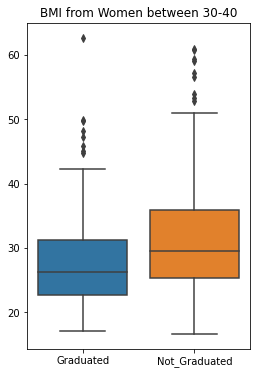

In [27]:
# Create a DataFrame with these two Series

df = pd.DataFrame({'Graduated': bmi_women_graduated, 'Not_Graduated': bmi_women_not_graduated})


# Make the Boxplot

plt.figure(figsize=(4,6)) 

plt.title('BMI from Women between 30-40')

sns.boxplot(data = df.loc[:,['Graduated','Not_Graduated']])

plt.show()

<AxesSubplot:title={'center':'BMI from Women between 30-40'}, xlabel='BMI', ylabel='Count'>

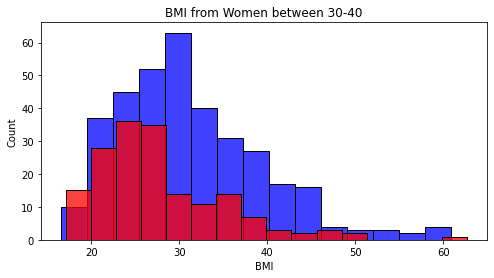

In [28]:
# Plot the Histogram for these two groups

plt.figure(figsize=(8,4))

plt.title('BMI from Women between 30-40')
plt.xlabel('BMI')

sns.histplot(df['Not_Graduated'],color='b')
sns.histplot(df['Graduated'],color='r')

In [29]:
# Summary

df.describe()

,Graduated,Not_Graduated
count,171.000000,354.000000
mean,27.808187,31.257345
std,7.358264,8.256083
min,17.100000,16.600000
25%,22.750000,25.300000
50%,26.300000,29.500000
75%,31.150000,35.875000
max,62.700000,60.900000


In [30]:
# Sample Sizes
n_bmi_women_graduated = len(bmi_women_graduated)
n_bmi_women_not_graduated = len(bmi_women_not_graduated)

# Means
mean_bmi_women_graduated = bmi_women_graduated.mean()
mean_bmi_women_not_graduated = bmi_women_not_graduated.mean()

# Standard Deviations
std_bmi_women_graduated = bmi_women_graduated.std()
std_bmi_women_not_graduated = bmi_women_not_graduated.std()

# Variations
var_bmi_women_graduated = bmi_women_graduated.var()
var_bmi_women_not_graduated = bmi_women_not_graduated.var()


print('----- Sample Sizes -----')
print(f'n_bmi_women_graduated: {n_bmi_women_graduated}')
print(f'n_bmi_women_not_graduated: {n_bmi_women_not_graduated}')
print()
print('----- Means -----')
print(f'mean_bmi_women_graduate: {round(mean_bmi_women_graduated,2)}')
print(f'mean_bmi_women_not_graduated: {round(mean_bmi_women_not_graduated,2)}')
print()
print('----- Standard Deviations -----')
print(f'std_bmi_women_graduated: {round(std_bmi_women_graduated,2)}')
print(f'std_bmi_women_not_graduated0: {round(std_bmi_women_not_graduated,2)}')
print()
print('----- Variations -----')
print(f'var_bmi_women_graduated: {round(var_bmi_women_graduated,2)}')
print(f'var_bmi_women_not_graduated0: {round(var_bmi_women_not_graduated,2)}')

----- Sample Sizes -----
n_bmi_women_graduated: 171
n_bmi_women_not_graduated: 354

----- Means -----
mean_bmi_women_graduate: 27.81
mean_bmi_women_not_graduated: 31.26

----- Standard Deviations -----
std_bmi_women_graduated: 7.36
std_bmi_women_not_graduated0: 8.26

----- Variations -----
var_bmi_women_graduated: 54.14
var_bmi_women_not_graduated0: 68.16


In [31]:
# Let's see how much is the difference between the variances 
(68.16-54.14)/68.16

0.20569248826291076

Because the populations variance is not equal (differ by 20%) we know that they are **not Pooled!**. But the exercise ask for the two analysis.

### Not Pooled - Assume that populations variances are not equal

In [32]:
# NOT POOLED - Assume that populations not equal

alpha = 0.05

# Graduated
n1 = 171
xbar1 = 27.81
s1 = 7.36

# Not Graduated
n2 = 354
xbar2 = 31.26
s2 = 8.26

delta_mu = 0   # Ho

z = ( (xbar1 - xbar2) - (delta_mu) )/ (np.sqrt( (s1**2/n1) + (s2**2/n2) ))

p_value = 2 * (1 - norm.cdf(abs(z)))     # We want the right side in normal distribution
                                         # (2*) because is a 2 tail test

print("Z-statistic:", round(z,2))   
print("P-value:", p_value)
print("Alpha:", round(alpha,4))
print()


if p_value < alpha:    ### For All Analysis ###
    print('(p-value < alpha): Reject Ho!')
else:
    print('(p-value > alpha): Fail to reject Ho.')

Z-statistic: -4.83
P-value: 1.3431058492052728e-06
Alpha: 0.05

(p-value < alpha): Reject Ho!


### Pooled - Assume that variances of the 2 populations assumed equal

In [33]:
# POOLED - Assume that variances of the 2 populations assumed equal

alpha = 0.05

# Graduated
n1 = 171
xbar1 = 27.81
s1 = 7.36

# Not Graduated
n2 = 354
xbar2 = 31.26
s2 = 8.26

delta_mu = 0   # Ho

z = ( (xbar1 - xbar2) - (delta_mu) )/ (np.sqrt((((n1-1)*s1**2) + ((n2-1)*s2**2))/(n1+n2-2)) * np.sqrt((1/n1)+(1/n2)))

p_value = 2 * (1 - norm.cdf(abs(z)))     # (2*) because is a 2 tail test
                                        

print("Z-statistic:", round(z,2))   
print("P-value:", p_value)
print("Alpha:", round(alpha,4))
print()


if p_value < alpha:    ### For All Analysis ###
    print('(p-value < alpha): Reject Ho!')
else:
    print('(p-value > alpha): Fail to reject Ho.')

Z-statistic: -4.64
P-value: 3.431431787381811e-06
Alpha: 0.05

(p-value < alpha): Reject Ho!


In [34]:
# Check

Dbmi_women_graduated = sm.stats.DescrStatsW(bmi_women_graduated)
Dbmi_women_not_graduated = sm.stats.DescrStatsW(bmi_women_not_graduated)

ntstat, npvalue = sm.stats.CompareMeans(Dbmi_women_graduated, Dbmi_women_not_graduated).ztest_ind(usevar='unequal')
ptstat, ppvalue = sm.stats.CompareMeans(Dbmi_women_graduated, Dbmi_women_not_graduated).ztest_ind(usevar='pooled')

print('--- Not-Pooled ---')
print(f'T-statistic: {round(ntstat,2)}')
print(f'P_value: {npvalue}')
print()
print('--- Pooled ---')
print(f'T-statistic: {round(ptstat,2)}')
print(f'P_value: {ppvalue}')

--- Not-Pooled ---
T-statistic: -4.83
P_value: 1.3404386169203498e-06

--- Pooled ---
T-statistic: -4.64
P_value: 3.4187910067116123e-06


__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

**Answer:** In both cases, p-value < alpha (0.05), this means that we need to "Reject Ho!", so Ha is correct:

    avg BMI women graduated != avg BMI women not graduated

__Q4b.__ Comment on the degree to which the two populations have different variances, and on the extent to which the results using different approaches to estimating the standard error of the mean difference give divergent results.

**Answer:** As mentioned earlier, because the variance in these populations are not equal (20%), the error considered must be the **Not Pooled** error. There means that p-value area are the smaller one, further reinforcing our conclusion.

## Question 5

Conduct a test of the null hypothesis that the first and second diastolic blood pressure measurements within a subject have the same mean values.

In [35]:
# Ho: mu firstDBP == mu secondDBP
# Ha: mu firstDBP != mu secondDBP

dx = da[['BPXDI1', 'BPXDI2']].dropna()

firDBP = dx['BPXDI1']
secDBP = dx['BPXDI2']

In [36]:
# Sample Sizes
n_firDBP = len(firDBP)
n_secDBP = len(secDBP)

# Means
mean_firDBP = firDBP.mean()
mean_secDBP = secDBP.mean()

# Standard Deviations
std_firDBP = firDBP.std()
std_secDBP = secDBP.std()


print('----- Sample Sizes -----')
print(f'n_firDBP: {n_firDBP}')
print(f'n_secDBP: {n_secDBP}')
print()
print('----- Means -----')
print(f'mean_firDBP: {round(mean_firDBP,2)}')
print(f'mean_secDBP: {round(mean_secDBP,2)}')
print()
print('----- Standard Deviations -----')
print(f'std_firDBP: {round(std_firDBP,2)}')
print(f'std_secDBP: {round(std_secDBP,2)}')

----- Sample Sizes -----
n_firDBP: 5369
n_secDBP: 5369

----- Means -----
mean_firDBP: 69.51
mean_secDBP: 69.17

----- Standard Deviations -----
std_firDBP: 12.85
std_secDBP: 12.88


In [37]:
# POOLED - Assume that variances of the 2 populations assumed equal

alpha = 0.05

# Graduated
n1 = 5369
xbar1 = 69.51
s1 = 12.85

# Not Graduated
n2 = 5369
xbar2 = 69.17
s2 = 12.88

delta_mu = 0   # Ho

z = ( (xbar1 - xbar2) - (delta_mu) )/ (np.sqrt((((n1-1)*s1**2) + ((n2-1)*s2**2))/(n1+n2-2)) * np.sqrt((1/n1)+(1/n2)))

p_value = 2 * (1 - norm.cdf(abs(z)))     # (2*) because is a 2 tail test
                                         

print("Z-statistic:", round(z,2))   
print("P-value:", p_value)
print("Alpha:", round(alpha,4))
print()


if p_value < alpha:    ### For All Analysis ###
    print('(p-value < alpha): Reject Ho!')
else:
    print('(p-value > alpha): Fail to reject Ho.')

Z-statistic: 1.37
P-value: 0.17090361932452391
Alpha: 0.05

(p-value > alpha): Fail to reject Ho.


In [38]:
# Check with module 'statsmodels.api' - Pooled

t_stat , p_value = sm.stats.ztest(x1 = firDBP, x2 = secDBP, alternative='two-sided') # Always Pooled

print(f'T-statistic: {round(t_stat,4)}')
print()
print(f'P_value: {p_value}')

T-statistic: 1.4058

P_value: 0.15978769381769953


__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

**Answer:** By distribution, we can statistically assess that both groups have the same means values.

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modfify the analysis above as appropriate for this setting.

In [39]:
# Not-Pooled - populations variance not equal

alpha = 0.05

# Graduated
n1 = 5369
xbar1 = 69.51
s1 = 12.85

# Not Graduated
n2 = 5369
xbar2 = 69.17
s2 = 12.88

delta_mu = 0   # Ho

z = ( (xbar1 - xbar2) - (delta_mu) )/ (np.sqrt( (s1**2/n1) + (s2**2/n2) ))

p_value = 2 * (1 - norm.cdf(abs(z)))     # (2*) because is a 2 tail test
                                         

print("Z-statistic:", round(z,2))   
print("P-value:", p_value)
print("Alpha:", round(alpha,4))
print()


if p_value < alpha:    ### For All Analysis ###
    print('(p-value < alpha): Reject Ho!')
else:
    print('(p-value > alpha): Fail to reject Ho.')

Z-statistic: 1.37
P-value: 0.17090361932452391
Alpha: 0.05

(p-value > alpha): Fail to reject Ho.


In [40]:
# Check - Not Pooled (unequal)

DfirDBP = sm.stats.DescrStatsW(firDBP)
DsecDBP = sm.stats.DescrStatsW(secDBP)

ntstat, npvalue = sm.stats.CompareMeans(DfirDBP, DsecDBP).ztest_ind(usevar='unequal')

print('--- Not-Pooled ---')
print(f'T-statistic: {round(ntstat,2)}')
print(f'P_value: {npvalue}')

--- Not-Pooled ---
T-statistic: 1.41
P_value: 0.15978769381769975


__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceeding two parts of the question differ.

**Answer:** The big difference is that for the same population, we have the same variance, and therefore *pooled*. With different people, we have can assume that they have different variances, *not pooled*).